In [ ]:
!pip install aidapy
!pip install pandas

In [6]:
# created with love in cooperation with ASPIS
from aidapy import load_data
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

selecting data from web lib

In [39]:
t0 = datetime(2000, 1, 1)
t1 = datetime(2021, 12, 31)
omnixr = load_data(mission='omni', start_time=t0, end_time=t1)

downloading data omni web

used wget command to download data from web</br>
(example due to files were available for some time only)</br>
!wget name-of-file-saved.lst https://omniweb.gsfc.nasa.gov/staging/omni2_N2i7aNrXvD.lst

In [ ]:
!wget -O data/2000.lst https://omniweb.gsfc.nasa.gov/staging/omni_min_SJVZ_UUpBK.lst

the code below is set to work with downloaded lst files from omniweb using wget!</br>
after downloading lst files we have manually replaced whitespaces between numbers to commas, added titles to columns and created csv file</br>
then it was necessary to convert date to datetime format since omniweb provides <b>year day_of_year hour</b> format only</br>
same way was for minute data, but we had to download lst file for each year separately due to amount of rows</br>
also, then it was necessary to convert date to datetime format since omniweb provides <b>year day_of_year hour minute</b> format only and then convert minute data to hour data by resampling by mean</br>

In [ ]:
web=pd.read_csv('data/2000.lst')
web['dt']=web[web.columns[:4]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
web=web.set_index(pd.to_datetime(web['dt'], format='%Y-%j-%H-%M')).drop(['dt','y','d','h','m'], axis=1)
for i in range(2001,2022):
    print('%s'%i)
    web1=pd.read_csv('data/%s.lst'%i)
    web1['dt']=web1[web1.columns[:4]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
    web1=web1.set_index(pd.to_datetime(web1['dt'], format='%Y-%j-%H-%M')).drop(['dt','y','d','h','m'], axis=1)
    web=web.append(web1)

In [ ]:
web.to_csv('data/all_ids_minute_raw.csv')

In [31]:
minute_data=pd.read_csv('data/all_ids_minute_raw.csv')
minute_data['dt']=pd.to_datetime(minute_data['dt'])
minute_data=minute_data.set_index(minute_data['dt'])

In [32]:
minute_data.head()

,dt,Vx Velocity[km/s],Vy Velocity[km/s],Vz Velocity[km/s],BSN location Xgse[Re],BSN location Ygse[Re],BSN location Zgse[Re],SYM/D[nT],SYM/H[nT],ASY/D[nT],ASY/H[nT]
dt,,,,,,,,,,,
2000-01-01 00:00:00,2000-01-01 00:00:00,99999.90000,99999.90000,99999.90000,12.05000,-0.69000,0.84000,-6,-44,61,48
2000-01-01 00:01:00,2000-01-01 00:01:00,-662.60000,7.30000,-46.50000,12.11000,-0.69000,0.81000,-6,-45,64,48
2000-01-01 00:02:00,2000-01-01 00:02:00,-661.40000,2.40000,-46.30000,12.24000,-0.48000,1.01000,-7,-45,67,48
2000-01-01 00:03:00,2000-01-01 00:03:00,-659.80000,-8.40000,-56.20000,12.28000,-0.36000,1.07000,-7,-45,69,48
2000-01-01 00:04:00,2000-01-01 00:04:00,99999.90000,99999.90000,99999.90000,9999.99000,9999.99000,9999.99000,-8,-45,69,47


In [33]:
minute_data.describe()

,Vx Velocity[km/s],Vy Velocity[km/s],Vz Velocity[km/s],BSN location Xgse[Re],BSN location Ygse[Re],BSN location Zgse[Re],SYM/D[nT],SYM/H[nT],ASY/D[nT],ASY/H[nT]
count,11571840.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000
mean,22727.26669,23057.54540,23053.60203,863.73056,850.37776,851.42534,-0.21100,-11.19220,17.39640,19.42506
std,42300.79186,42119.90119,42122.05893,2786.90086,2790.97362,2790.65406,2.98467,18.64729,12.54071,15.25533
min,-1126.20000,-261.30000,-310.40000,3.76000,-12.57000,-9.54000,-71.00000,-490.00000,0.00000,0.00000
25%,-454.90000,-9.60000,-13.20000,12.82000,-1.34000,-0.18000,-2.00000,-18.00000,9.00000,11.00000
50%,-373.10000,5.60000,1.60000,13.71000,-0.90000,0.25000,0.00000,-8.00000,14.00000,16.00000
75%,-292.10000,55.00000,40.00000,14.71000,-0.38000,0.71000,1.00000,-1.00000,22.00000,24.00000
max,99999.90000,99999.90000,99999.90000,9999.99000,9999.99000,9999.99000,113.00000,151.00000,472.00000,984.00000


In [34]:
minute_data[['Vx Velocity[km/s]','Vy Velocity[km/s]', 'Vz Velocity[km/s]']]=minute_data[['Vx Velocity[km/s]','Vy Velocity[km/s]', 'Vz Velocity[km/s]']].replace(99999.90000, np.nan)
minute_data[['BSN location Xgse[Re]', 'BSN location Ygse[Re]', 'BSN location Zgse[Re]']]=minute_data[['BSN location Xgse[Re]', 'BSN location Ygse[Re]', 'BSN location Zgse[Re]']].replace(9999.99000, np.nan)

In [35]:
minute_data.describe()

,Vx Velocity[km/s],Vy Velocity[km/s],Vz Velocity[km/s],BSN location Xgse[Re],BSN location Ygse[Re],BSN location Zgse[Re],SYM/D[nT],SYM/H[nT],ASY/D[nT],ASY/H[nT]
count,8903674.00000,8903674.00000,8903674.00000,10586765.00000,10586765.00000,10586765.00000,11571840.00000,11571840.00000,11571840.00000,11571840.00000
mean,-429.04080,0.21260,-4.91247,13.62188,-0.97336,0.17169,-0.21100,-11.19220,17.39640,19.42506
std,101.83653,24.09499,21.85691,1.58759,0.69924,0.64918,2.98467,18.64729,12.54071,15.25533
min,-1126.20000,-261.30000,-310.40000,3.76000,-12.57000,-9.54000,-71.00000,-490.00000,0.00000,0.00000
25%,-483.70000,-13.80000,-17.20000,12.73000,-1.39000,-0.23000,-2.00000,-18.00000,9.00000,11.00000
50%,-406.50000,-1.50000,-5.40000,13.57000,-0.98000,0.18000,0.00000,-8.00000,14.00000,16.00000
75%,-352.50000,11.90000,7.20000,14.40000,-0.54000,0.57000,1.00000,-1.00000,22.00000,24.00000
max,-230.00000,583.40000,451.60000,30.00000,9.79000,9.94000,113.00000,151.00000,472.00000,984.00000


resampling minute data to hour data

In [36]:
minute_data=minute_data.resample('60T', on='dt').mean()


In [42]:
hour_data=pd.read_csv('data/all_ids_web_raw.csv')

In [43]:
hour_data['dt']=hour_data[hour_data.columns[:3]].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
hour_data['dt']=pd.to_datetime(hour_data['dt'], format='%Y-%j-%H')
hour_data=hour_data.set_index(hour_data['dt']).drop(['y','d','h', 'Unnamed: 29'], axis=1)


In [44]:
hour_data.head()

,Scalar B[nT],BX (GSE[GSM)[nT],BY (GSE) [nT],BZ (GSE) [nT],SW Plasma Temperature[K],SW Proton Density[N/cm^3],SW Plasma Speed[km/s],SW Plasma flow long. angle,SW Plasma flow lat. angle,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,Alfen mach number,Magnetosonic Much num.,Quasy-Invariant,Kp index,R (Sunspot No.),Dst-index[nT],ap_index[nT],f10.7_index,AE-index[nT],AL-index[nT],AU-index[nT],pc-index,Lyman_alph,dt
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,7.50000,-5.60000,2.50000,1.00000,324194.00000,2.90000,675.00000,0.90000,-4.00000,9.99900,2.64000,-1.08000,0.97000,7.70000,5.70000,0.02030,53,71,-45,56,125.60000,517,-279,238,3.70000,0.00789,2000-01-01 00:00:00
2000-01-01 01:00:00,7.80000,-4.90000,3.90000,-3.70000,302235.00000,2.60000,677.00000,0.50000,-0.50000,9.99900,2.38000,1.83000,0.77000,7.00000,5.40000,0.02430,53,71,-37,56,125.60000,313,-146,167,2.20000,0.00789,2000-01-01 01:00:00
2000-01-01 02:00:00,7.60000,-2.70000,4.90000,-2.60000,349786.00000,2.20000,708.00000,-0.20000,-1.00000,9.99900,2.21000,1.13000,0.76000,6.90000,5.40000,0.02490,53,71,-37,56,125.60000,559,-422,137,4.40000,0.00789,2000-01-01 02:00:00
2000-01-01 03:00:00,7.40000,-3.90000,2.90000,-2.80000,362297.00000,2.10000,706.00000,1.50000,-0.70000,9.99900,2.09000,1.62000,0.78000,6.90000,5.30000,0.02490,47,71,-41,39,125.60000,567,-429,138,6.30000,0.00789,2000-01-01 03:00:00
2000-01-01 04:00:00,7.00000,-3.50000,1.80000,-1.40000,429384.00000,2.00000,721.00000,1.80000,-2.50000,9.99900,2.08000,0.87000,0.95000,7.30000,5.40000,0.02240,47,71,-45,39,125.60000,287,-191,96,3.70000,0.00789,2000-01-01 04:00:00


In [45]:
hour_data=hour_data.join(minute_data)

after that we used head function to see if we have correct data

In [46]:
hour_data.head()

,Scalar B[nT],BX (GSE[GSM)[nT],BY (GSE) [nT],BZ (GSE) [nT],SW Plasma Temperature[K],SW Proton Density[N/cm^3],SW Plasma Speed[km/s],SW Plasma flow long. angle,SW Plasma flow lat. angle,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,Alfen mach number,Magnetosonic Much num.,Quasy-Invariant,Kp index,R (Sunspot No.),Dst-index[nT],ap_index[nT],f10.7_index,AE-index[nT],AL-index[nT],AU-index[nT],pc-index,Lyman_alph,dt,Vx Velocity[km/s],Vy Velocity[km/s],Vz Velocity[km/s],BSN location Xgse[Re],BSN location Ygse[Re],BSN location Zgse[Re],SYM/D[nT],SYM/H[nT],ASY/D[nT],ASY/H[nT]
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,7.50000,-5.60000,2.50000,1.00000,324194.00000,2.90000,675.00000,0.90000,-4.00000,9.99900,2.64000,-1.08000,0.97000,7.70000,5.70000,0.02030,53,71,-45,56,125.60000,517,-279,238,3.70000,0.00789,2000-01-01 00:00:00,-675.66250,3.68000,-58.21000,12.46529,-0.62863,1.09353,-6.76667,-42.45000,47.83333,42.56667
2000-01-01 01:00:00,7.80000,-4.90000,3.90000,-3.70000,302235.00000,2.60000,677.00000,0.50000,-0.50000,9.99900,2.38000,1.83000,0.77000,7.00000,5.40000,0.02430,53,71,-37,56,125.60000,313,-146,167,2.20000,0.00789,2000-01-01 01:00:00,-676.00200,8.85200,-13.02400,12.12552,-0.72069,0.27362,-1.00000,-35.00000,28.95000,36.33333
2000-01-01 02:00:00,7.60000,-2.70000,4.90000,-2.60000,349786.00000,2.20000,708.00000,-0.20000,-1.00000,9.99900,2.21000,1.13000,0.76000,6.90000,5.40000,0.02490,53,71,-37,56,125.60000,559,-422,137,4.40000,0.00789,2000-01-01 02:00:00,-710.50000,1.71481,-4.02037,12.15404,-0.56456,0.05877,9.56667,-36.26667,33.51667,38.05000
2000-01-01 03:00:00,7.40000,-3.90000,2.90000,-2.80000,362297.00000,2.10000,706.00000,1.50000,-0.70000,9.99900,2.09000,1.62000,0.78000,6.90000,5.30000,0.02490,47,71,-41,39,125.60000,567,-429,138,6.30000,0.00789,2000-01-01 03:00:00,-705.49565,10.39130,-8.09783,12.26900,-0.74217,0.09967,10.16667,-34.00000,38.98333,54.96667
2000-01-01 04:00:00,7.00000,-3.50000,1.80000,-1.40000,429384.00000,2.00000,721.00000,1.80000,-2.50000,9.99900,2.08000,0.87000,0.95000,7.30000,5.40000,0.02240,47,71,-45,39,125.60000,287,-191,96,3.70000,0.00789,2000-01-01 04:00:00,-717.42250,25.68500,-27.89000,12.44879,-1.04810,0.55000,9.13333,-38.35000,24.80000,35.60000


then we used describe, simple plot and isnull function to find out, that omni data used big unreal values instead of none/nan

In [47]:
hour_data.isnull().sum()

Scalar B[nT]                     0
BX (GSE[GSM)[nT]                 0
BY (GSE) [nT]                    0
BZ (GSE) [nT]                    0
SW Plasma Temperature[K]         0
SW Proton Density[N/cm^3]        0
SW Plasma Speed[km/s]            0
SW Plasma flow long. angle       0
SW Plasma flow lat. angle        0
Alpha/Prot. ratio                0
Flow pressure                    0
E elecrtric field                0
Plasma Beta                      0
Alfen mach number                0
Magnetosonic Much num.           0
Quasy-Invariant                  0
Kp index                         0
R (Sunspot No.)                  0
Dst-index[nT]                    0
ap_index[nT]                     0
f10.7_index                      0
AE-index[nT]                     0
AL-index[nT]                     0
AU-index[nT]                     0
pc-index                         0
Lyman_alph                       0
dt                               0
Vx Velocity[km/s]             7973
Vy Velocity[km/s]   

In [48]:
hour_data.describe()


,Scalar B[nT],BX (GSE[GSM)[nT],BY (GSE) [nT],BZ (GSE) [nT],SW Plasma Temperature[K],SW Proton Density[N/cm^3],SW Plasma Speed[km/s],SW Plasma flow long. angle,SW Plasma flow lat. angle,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,Alfen mach number,Magnetosonic Much num.,Quasy-Invariant,Kp index,R (Sunspot No.),Dst-index[nT],ap_index[nT],f10.7_index,AE-index[nT],AL-index[nT],AU-index[nT],pc-index,Lyman_alph,Vx Velocity[km/s],Vy Velocity[km/s],Vz Velocity[km/s],BSN location Xgse[Re],BSN location Ygse[Re],BSN location Zgse[Re],SYM/D[nT],SYM/H[nT],ASY/D[nT],ASY/H[nT]
count,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,192864.00000,184891.00000,184891.00000,184891.00000,185067.00000,185067.00000,185067.00000,192864.00000,192864.00000,192864.00000,192864.00000
mean,6.75116,1.16358,1.14577,1.14725,295705.01833,29.32311,445.44706,1.67253,1.02815,1.01920,4.24222,2.10469,26.45362,33.48159,7.98891,0.25796,17.42278,61.02651,-11.56819,9.67504,106.71564,1517.11250,13543.16308,13696.55554,47.35477,0.00728,-427.56301,0.51304,-4.99856,13.62958,-0.97649,0.17113,-0.21100,-11.19220,17.39640,19.42506
std,34.00117,34.22045,34.26475,34.16856,1406656.98794,150.61951,418.42957,42.58373,42.65265,2.97517,14.95464,45.68273,152.51390,150.61940,14.42682,1.51697,13.43968,63.12482,19.51600,15.24144,52.92624,3375.72786,34357.71331,34296.55691,210.28276,0.00116,101.36258,22.47504,19.55580,1.54032,0.65846,0.59741,2.79406,18.51503,11.89840,14.62998
min,0.40000,-40.80000,-33.00000,-53.70000,3299.00000,0.10000,233.00000,-26.90000,-17.80000,0.00100,0.03000,-35.94000,0.00000,0.60000,0.60000,0.00010,0.00000,0.00000,-422.00000,0.00000,63.40000,3.00000,-2452.00000,-260.00000,-21.50000,0.00576,-1071.69762,-226.89388,-217.17347,4.89533,-10.41700,-6.09696,-51.83333,-461.30000,0.00000,0.30000
25%,3.70000,-2.40000,-2.40000,-1.30000,35762.75000,3.00000,351.00000,-1.60000,-2.20000,0.02000,1.08000,-0.57000,1.01000,7.10000,5.10000,0.00860,7.00000,12.00000,-19.00000,3.00000,72.70000,50.00000,-125.00000,23.00000,0.20000,0.00633,-482.07407,-12.40000,-16.11947,12.75469,-1.36700,-0.19322,-1.65000,-17.50000,9.73333,10.75000
50%,4.90000,0.00000,-0.10000,0.00000,67447.50000,4.70000,404.00000,-0.20000,-0.80000,0.03400,1.57000,-0.00000,1.66000,9.30000,5.80000,0.01430,13.00000,40.00000,-8.00000,5.00000,89.40000,128.00000,-36.00000,53.00000,0.70000,0.00697,-404.75814,-0.98983,-5.41250,13.57883,-0.98100,0.18150,-0.15000,-8.06667,14.53333,15.86667
75%,6.70000,2.40000,2.40000,1.30000,126832.50000,7.60000,484.00000,1.30000,0.60000,0.05100,2.36000,0.60000,2.88000,12.10000,6.50000,0.02480,27.00000,98.00000,0.00000,12.00000,128.70000,386.00000,-11.00000,138.00000,1.60000,0.00799,-351.39804,11.44553,5.92339,14.39250,-0.57576,0.53809,1.26667,-0.93333,21.61667,23.43333
max,999.90000,999.90000,999.90000,999.90000,9999999.00000,999.90000,9999.00000,999.90000,999.90000,9.99900,99.99000,999.99000,999.99000,999.90000,99.90000,9.99990,90.00000,353.00000,77.00000,400.00000,999.90000,9999.00000,99999.00000,99999.00000,999.90000,0.01060,-232.45000,547.41000,354.46735,30.00000,5.59333,5.63500,40.53333,103.01667,292.61667,616.31667


array([<AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel

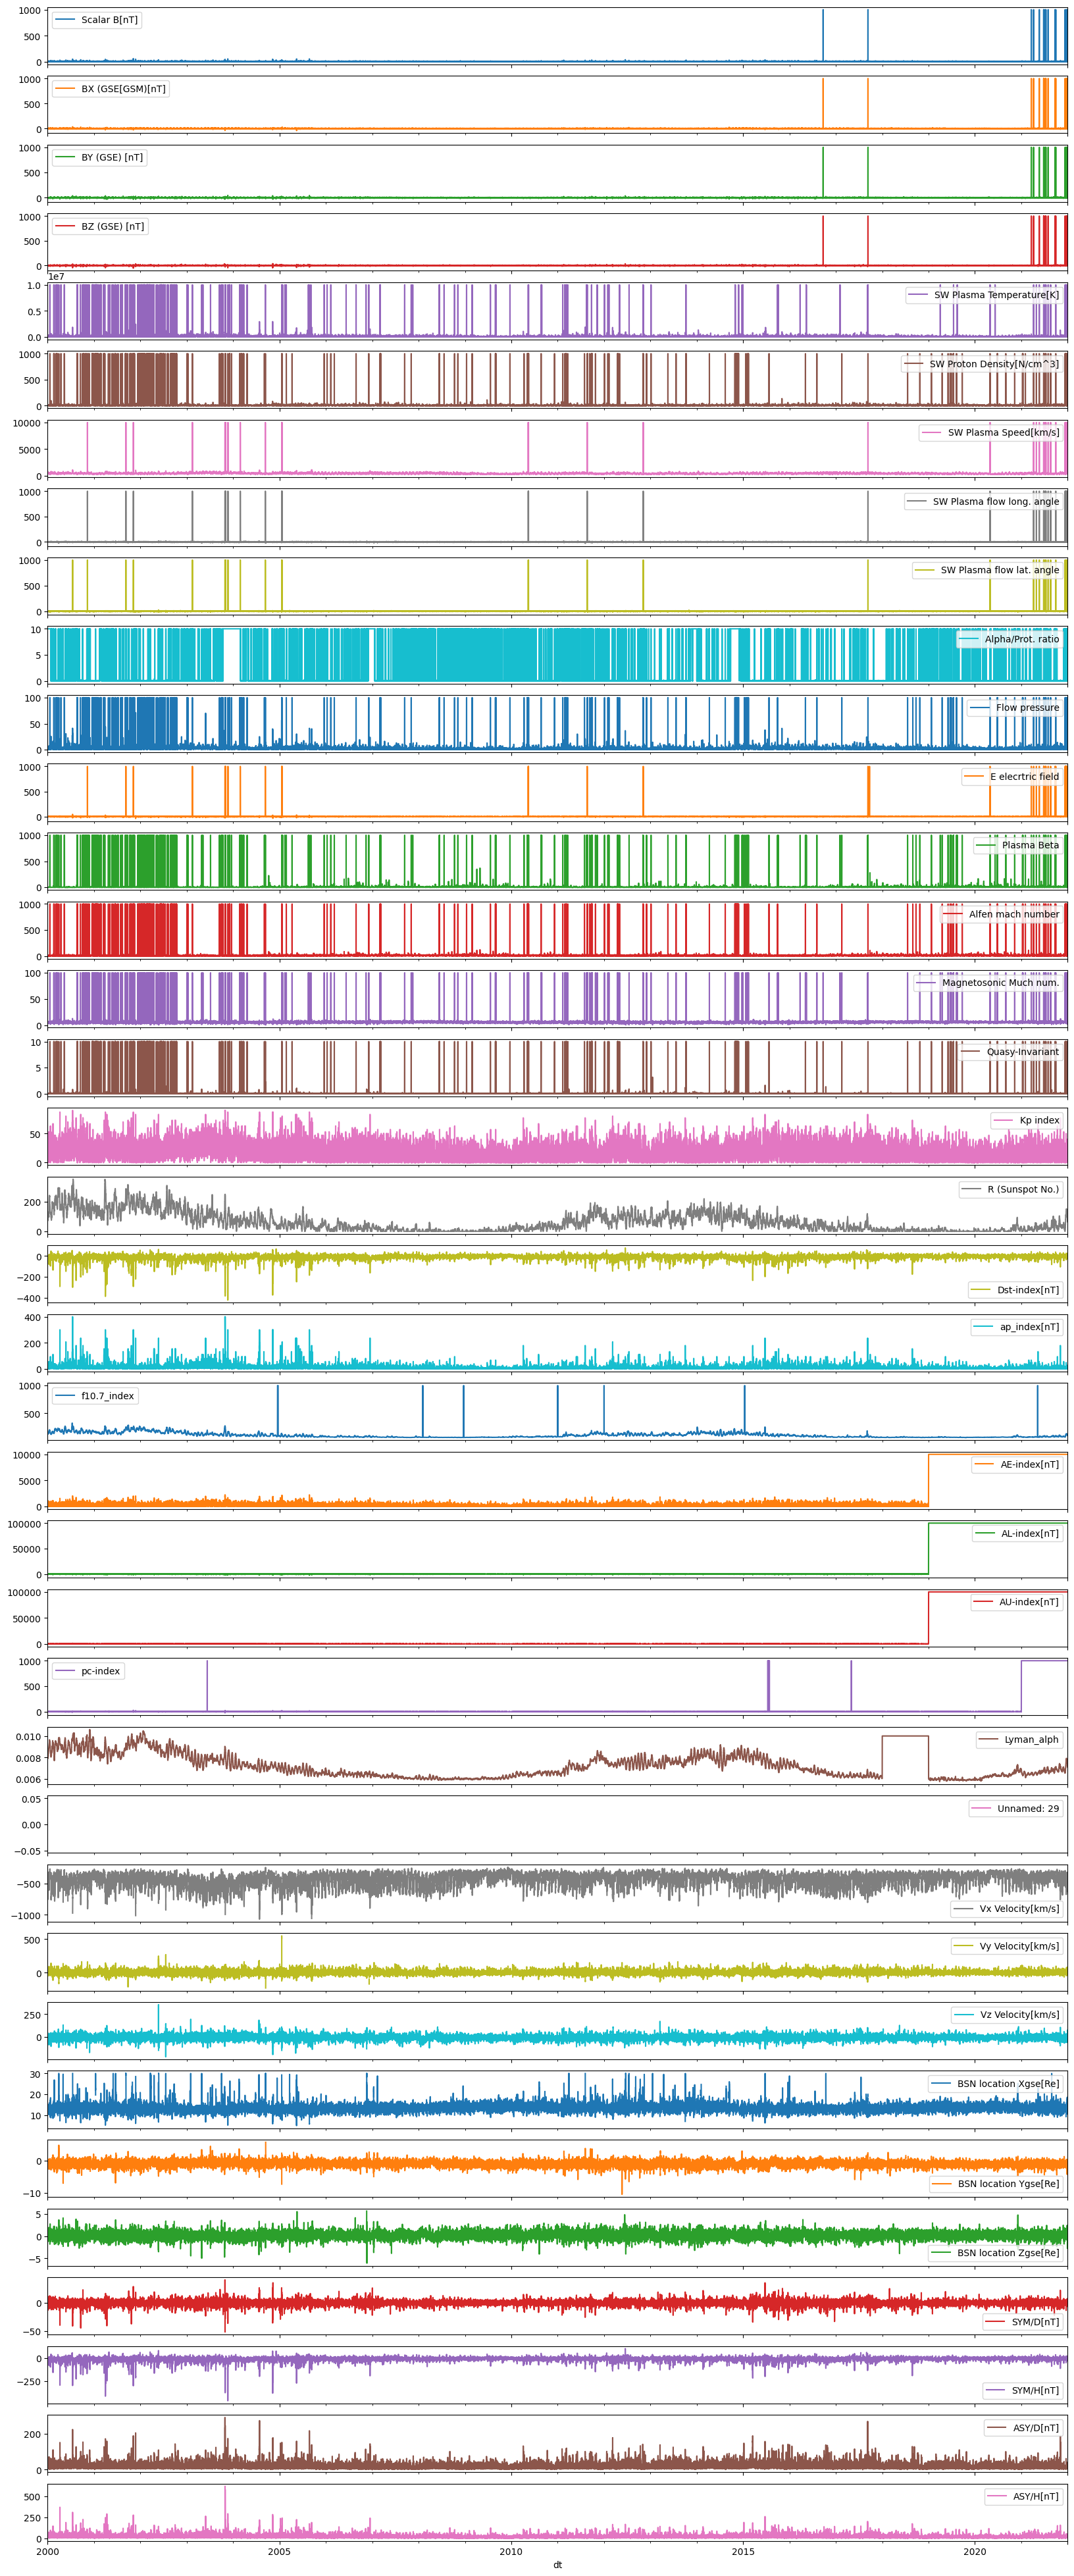

In [43]:
hour_data.plot(subplots=True, figsize=(20,50))

replacing 9s with nan value since they appear to be oultiers

In [49]:
hour_data[['SW Plasma Temperature[K]']]=hour_data[['SW Plasma Temperature[K]']].replace(9999999.00000, np.nan)
hour_data[['AL-index[nT]', 'AU-index[nT]']]=hour_data[['AL-index[nT]', 'AU-index[nT]']].replace(99999.00000, np.nan)
hour_data[['SW Plasma Speed[km/s]', 'AE-index[nT]']]=hour_data[['SW Plasma Speed[km/s]', 'AE-index[nT]']].replace(9999.00000, np.nan)
hour_data[['E elecrtric field', 'Plasma Beta']]=hour_data[['E elecrtric field', 'Plasma Beta']].replace(999.99000, np.nan)
hour_data[['Alfen mach number', 'Scalar B[nT]', 'BX (GSE[GSM)[nT]', 'BY (GSE) [nT]', 'BZ (GSE) [nT]', 'SW Proton Density[N/cm^3]', 'SW Plasma flow long. angle', 'SW Plasma flow lat. angle', 'f10.7_index', 'pc-index']]=hour_data[['Alfen mach number', 'Scalar B[nT]', 'BX (GSE[GSM)[nT]', 'BY (GSE) [nT]', 'BZ (GSE) [nT]', 'SW Proton Density[N/cm^3]', 'SW Plasma flow long. angle', 'SW Plasma flow lat. angle', 'f10.7_index', 'pc-index']].replace(999.90000, np.nan)
hour_data[['Flow pressure']]=hour_data[['Flow pressure']].replace(99.99000, np.nan)
hour_data[['Magnetosonic Much num.']]=hour_data[['Magnetosonic Much num.']].replace(99.90000, np.nan)
hour_data[['Quasy-Invariant']]=hour_data[['Quasy-Invariant']].replace(9.99990, np.nan)
hour_data[['Alpha/Prot. ratio']]=hour_data[['Alpha/Prot. ratio']].replace(9.99900, np.nan)


In [50]:
hour_data.describe()

,Scalar B[nT],BX (GSE[GSM)[nT],BY (GSE) [nT],BZ (GSE) [nT],SW Plasma Temperature[K],SW Proton Density[N/cm^3],SW Plasma Speed[km/s],SW Plasma flow long. angle,SW Plasma flow lat. angle,Alpha/Prot. ratio,Flow pressure,E elecrtric field,Plasma Beta,Alfen mach number,Magnetosonic Much num.,Quasy-Invariant,Kp index,R (Sunspot No.),Dst-index[nT],ap_index[nT],f10.7_index,AE-index[nT],AL-index[nT],AU-index[nT],pc-index,Lyman_alph,Vx Velocity[km/s],Vy Velocity[km/s],Vz Velocity[km/s],BSN location Xgse[Re],BSN location Ygse[Re],BSN location Zgse[Re],SYM/D[nT],SYM/H[nT],ASY/D[nT],ASY/H[nT]
count,192640.00000,192640.00000,192640.00000,192640.00000,188912.00000,188333.00000,192517.00000,192515.00000,192514.00000,173788.00000,188325.00000,192461.00000,188248.00000,188295.00000,188253.00000,188302.00000,192864.00000,192864.00000,192864.00000,192864.00000,192600.00000,166560.00000,166560.00000,166560.00000,183902.00000,192864.00000,184891.00000,184891.00000,184891.00000,185067.00000,185067.00000,185067.00000,192864.00000,192864.00000,192864.00000,192864.00000
mean,5.59634,0.00225,-0.01558,-0.01410,92693.19369,5.97253,428.22737,-0.13710,-0.78785,0.03352,1.93451,0.01519,2.58168,10.03134,5.73767,0.02194,17.42278,61.02651,-11.56819,9.67504,105.49134,177.60981,-110.38119,67.23578,0.93488,0.00728,-427.56301,0.51304,-4.99856,13.62958,-0.97649,0.17113,-0.21100,-11.19220,17.39640,19.42506
std,3.02854,3.34547,3.76672,2.75709,93631.63440,4.80968,102.91891,2.63680,2.30195,0.02091,1.65735,1.34950,4.54612,4.88819,1.11721,0.04406,13.43968,63.12482,19.51600,15.24144,41.35207,198.32552,143.34783,68.94665,1.28138,0.00116,101.36258,22.47504,19.55580,1.54032,0.65846,0.59741,2.79406,18.51503,11.89840,14.62998
min,0.40000,-40.80000,-33.00000,-53.70000,3299.00000,0.10000,233.00000,-26.90000,-17.80000,0.00100,0.03000,-35.94000,0.00000,0.60000,0.60000,0.00010,0.00000,0.00000,-422.00000,0.00000,63.40000,3.00000,-2452.00000,-260.00000,-21.50000,0.00576,-1071.69762,-226.89388,-217.17347,4.89533,-10.41700,-6.09696,-51.83333,-461.30000,0.00000,0.30000
25%,3.70000,-2.40000,-2.40000,-1.30000,35215.75000,3.00000,351.00000,-1.60000,-2.20000,0.01800,1.07000,-0.57000,0.99000,7.10000,5.10000,0.00850,7.00000,12.00000,-19.00000,3.00000,72.70000,45.00000,-149.00000,21.00000,0.10000,0.00633,-482.07407,-12.40000,-16.11947,12.75469,-1.36700,-0.19322,-1.65000,-17.50000,9.73333,10.75000
50%,4.90000,0.00000,-0.10000,0.00000,65774.50000,4.60000,404.00000,-0.20000,-0.80000,0.03100,1.54000,0.00000,1.63000,9.20000,5.80000,0.01400,13.00000,40.00000,-8.00000,5.00000,89.30000,97.00000,-50.00000,42.00000,0.60000,0.00697,-404.75814,-0.98983,-5.41250,13.57883,-0.98100,0.18150,-0.15000,-8.06667,14.53333,15.86667
75%,6.70000,2.40000,2.40000,1.20000,121437.75000,7.30000,484.00000,1.30000,0.60000,0.04600,2.28000,0.60000,2.75000,11.80000,6.50000,0.02360,27.00000,98.00000,0.00000,12.00000,128.50000,240.00000,-20.00000,90.00000,1.50000,0.00799,-351.39804,11.44553,5.92339,14.39250,-0.57576,0.53809,1.26667,-0.93333,21.61667,23.43333
max,62.00000,34.80000,46.10000,37.50000,6632456.00000,137.20000,1189.00000,33.80000,24.10000,0.58300,71.04000,47.11000,368.55000,122.90000,12.70000,3.28080,90.00000,353.00000,77.00000,400.00000,325.10000,2241.00000,22.00000,1226.00000,28.00000,0.01060,-232.45000,547.41000,354.46735,30.00000,5.59333,5.63500,40.53333,103.01667,292.61667,616.31667


array([<AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel='dt'>,
       <AxesSubplot: xlabel='dt'>, <AxesSubplot: xlabel

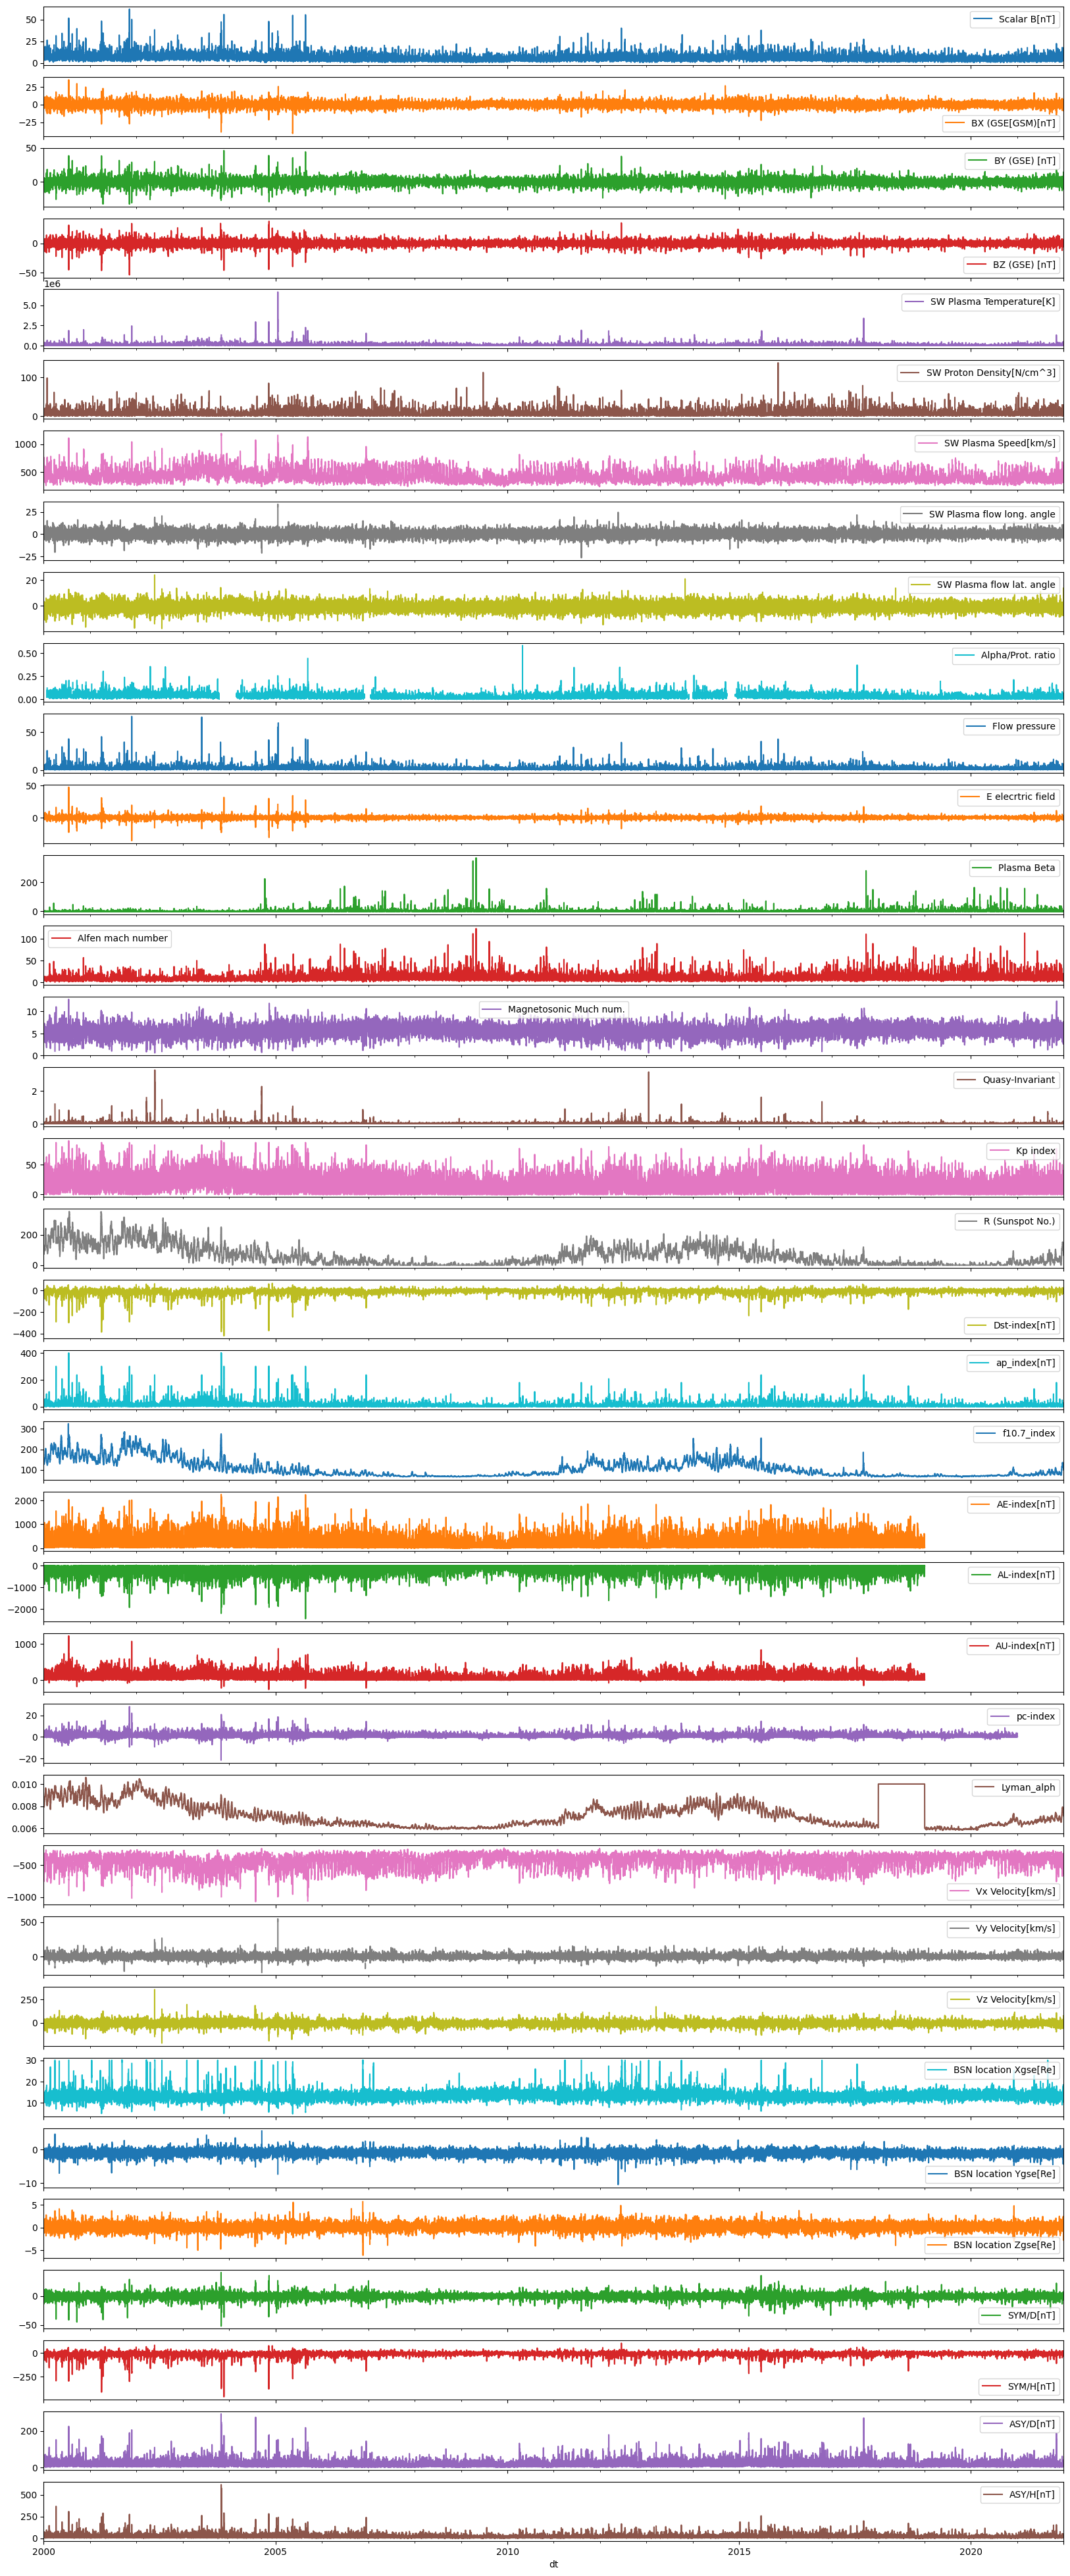

In [23]:
hour_data.plot(subplots=True, figsize=(20,50))

then we used replace function to replace those big values with numpy nan values and checked them again

In [52]:
solar_indexes=pd.DataFrame()
solar_indexes['dt']=hour_data['dt']
solar_indexes=solar_indexes.set_index(solar_indexes['dt'])
solar_indexes['F10.7 index [sfu]']=hour_data['f10.7_index']


In [51]:
hour_data.isnull().sum()

Scalar B[nT]                    224
BX (GSE[GSM)[nT]                224
BY (GSE) [nT]                   224
BZ (GSE) [nT]                   224
SW Plasma Temperature[K]       3952
SW Proton Density[N/cm^3]      4531
SW Plasma Speed[km/s]           347
SW Plasma flow long. angle      349
SW Plasma flow lat. angle       350
Alpha/Prot. ratio             19076
Flow pressure                  4539
E elecrtric field               403
Plasma Beta                    4616
Alfen mach number              4569
Magnetosonic Much num.         4611
Quasy-Invariant                4562
Kp index                          0
R (Sunspot No.)                   0
Dst-index[nT]                     0
ap_index[nT]                      0
f10.7_index                     264
AE-index[nT]                  26304
AL-index[nT]                  26304
AU-index[nT]                  26304
pc-index                       8962
Lyman_alph                        0
dt                                0
Vx Velocity[km/s]           

In [54]:
hour_data.drop(['dt'], axis=1).to_csv('all_ids_final_final.csv')